In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

# Models - Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
telco = pd.read_csv('/content/drive/MyDrive/telco_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
proj = telco.copy()

In [ ]:
proj[proj.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# print first 5 rows
proj.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
 #convert datatype for 'TotalCharges'
proj['TotalCharges'] = pd.to_numeric(proj['TotalCharges'], errors='coerce')

In [ ]:
# drop missing values
proj.dropna(inplace=True)

# drop customerID
proj.drop('customerID', axis=1, inplace=True)

In [ ]:
# summary dataset
proj.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [ ]:
# To check unique value without int or float in dataset
for col in proj.columns:
    if proj[col].dtype != 'int64' and proj[col].dtype != 'float64':
        print(f'{col} : {proj[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# check missing value
print(proj.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Visualizing the percentage distribution of churn vs. non-churn customers
l = list(proj['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

labels = ['Not-Churn Customer', 'Churn Customer']

fig = px.pie(values=circle, names=labels, title='Churn - Not-Churn %', hole=0.4,
             color_discrete_sequence=['#3498db', '#e74c3c'])

# Customize pie chart appearance
fig.update_traces(textinfo='percent+label', pull=[0.1, 0], marker=dict(line=dict(color='black', width=2)))

# Set chart size and margins
fig.update_layout(width=400, height=400, margin=dict(l=50, r=50, b=50, t=50))

fig.show()

# Visualizing the count of churned vs. non-churned customers
fig = px.histogram(proj, x='Churn', color='Churn',
                   labels={'Churn': 'Customer Status'}, color_discrete_sequence=['#3498db', '#e74c3c'])

# Set chart size and margins
fig.update_layout(width=400, height=300, margin=dict(l=50, r=50, b=50, t=50))

fig.show()


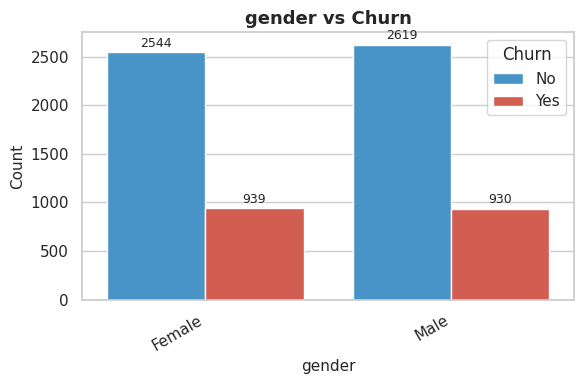

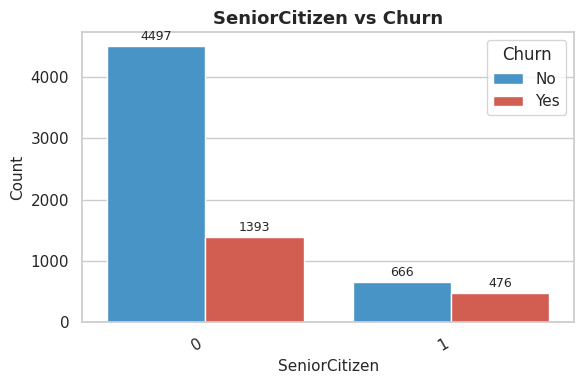

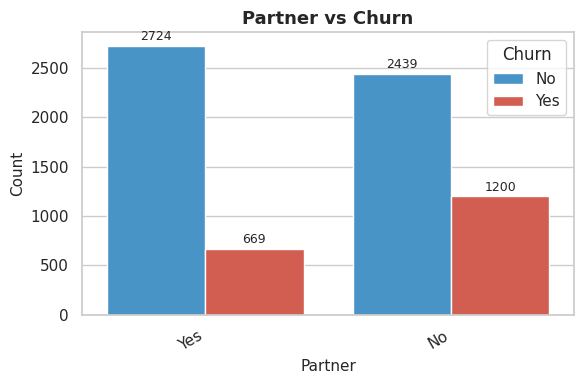

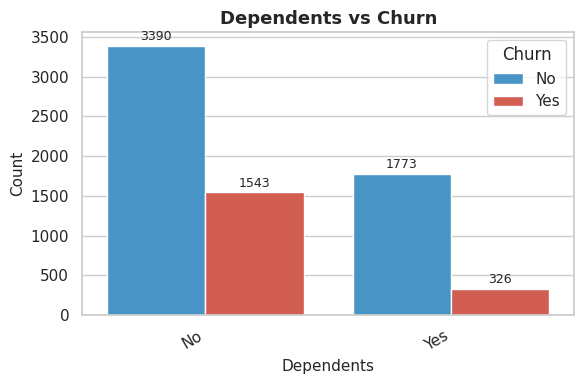

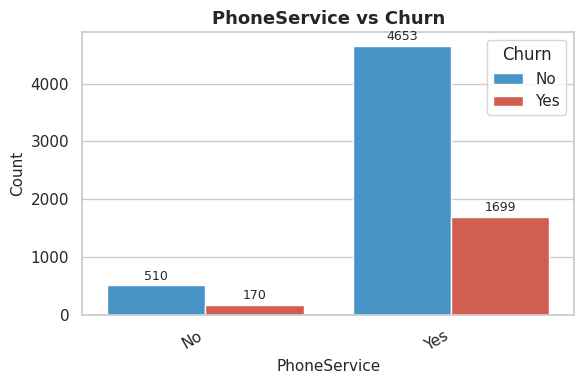

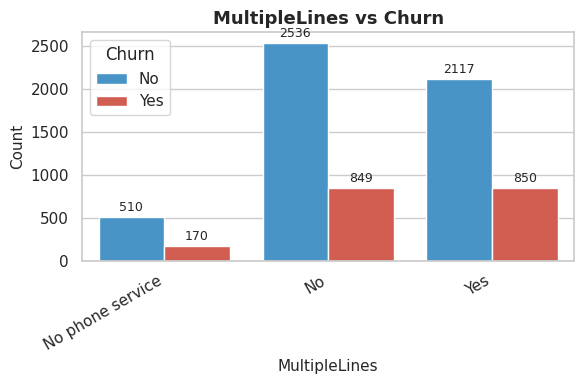

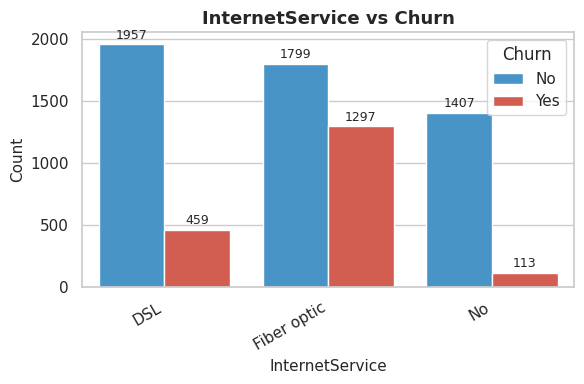

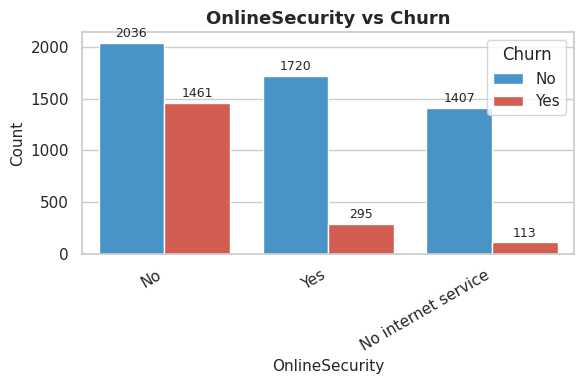

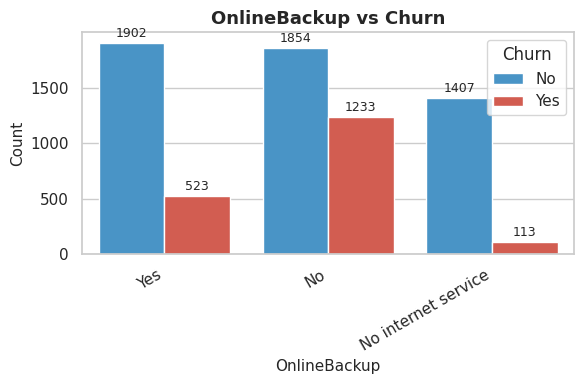

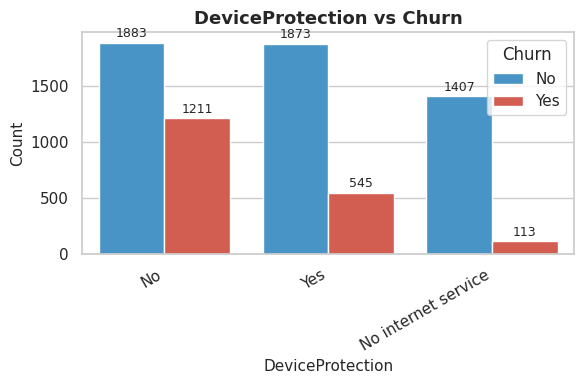

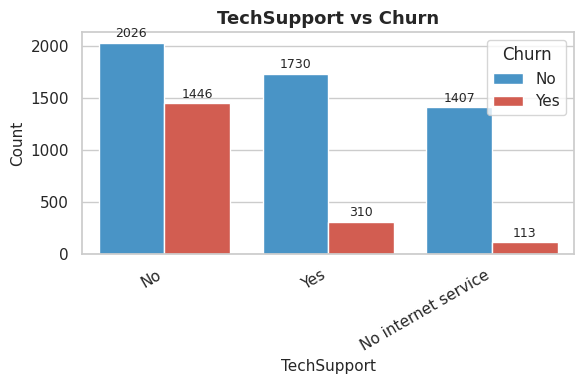

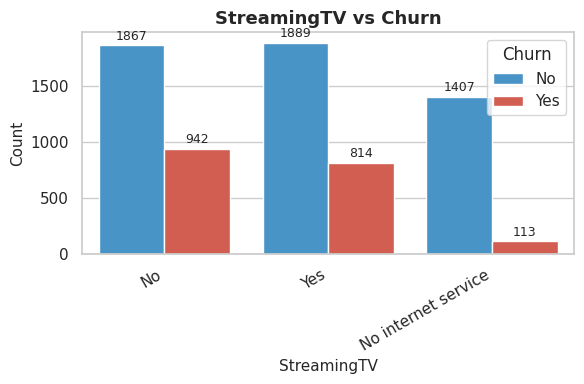

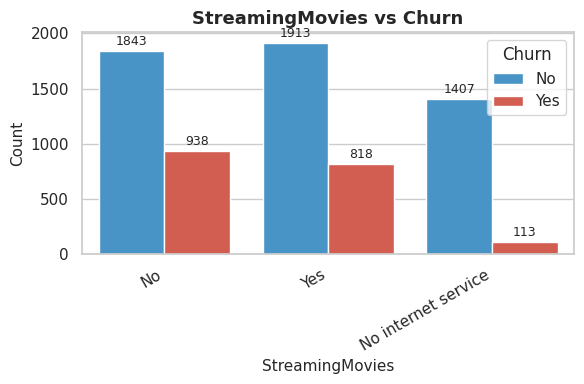

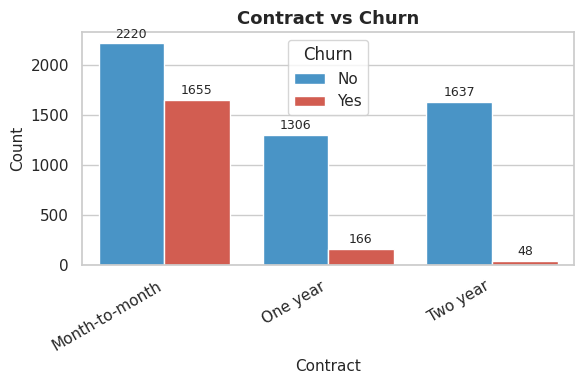

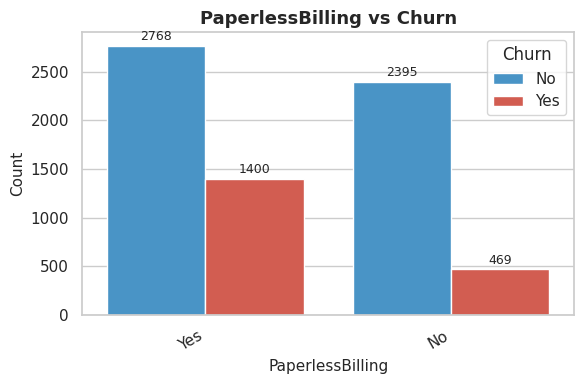

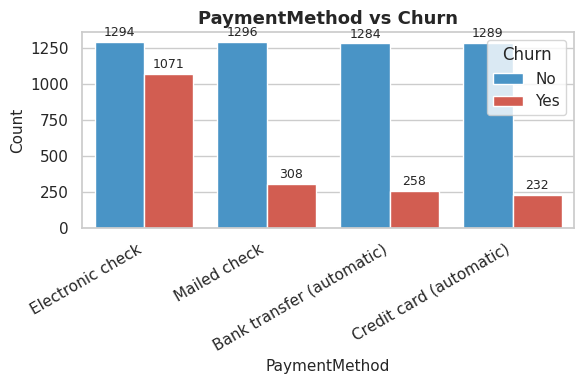

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean whitegrid theme for consistency
sns.set_theme(style="whitegrid")

# Define consistent colors for Churn and Not-Churn
colors = {'Yes': '#e74c3c', 'No': '#3498db'}  # Red for Churn, Blue for Not-Churn

# Define categorical features by excluding numerical and target columns
excluded_cols = ['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']
predictors = proj.drop(columns=excluded_cols).columns

# Plot count plots for each categorical feature against churn status
for i, predictor in enumerate(predictors):
    plt.figure(i, figsize=(6, 4))
    ax = sns.countplot(data=proj, x=predictor, hue='Churn', palette=colors)

    # Set plot title and axis labels
    ax.set_title(f'{predictor} vs Churn', fontsize=13, weight='bold')
    ax.set_xlabel(predictor, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    plt.xticks(rotation=30, ha='right')

    # Annotate bars with count labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

    plt.tight_layout()
    plt.show()


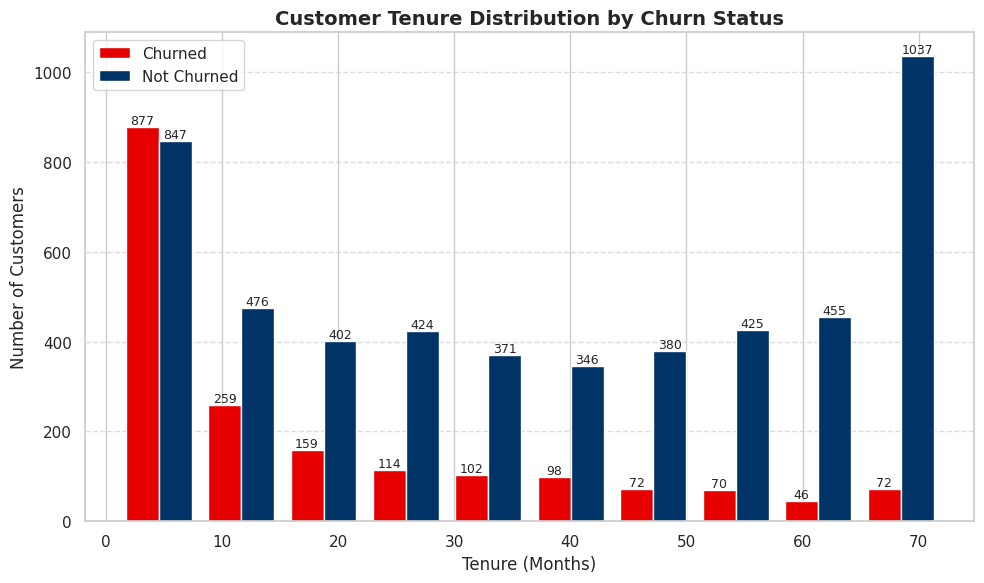

In [ ]:
# Separate the data into churned and non-churned customers
churned = proj[proj['Churn'] == 'Yes']
not_churned = proj[proj['Churn'] == 'No']

# Create a histogram to compare tenure distribution between churned and non-churned customers
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10,
         color=['#e60000', '#003366'], label=['Churned', 'Not Churned'])

# Add plot title and axis labels
plt.title('Customer Tenure Distribution by Churn Status', fontsize=14, weight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with frequency values
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height, int(height),
                       ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


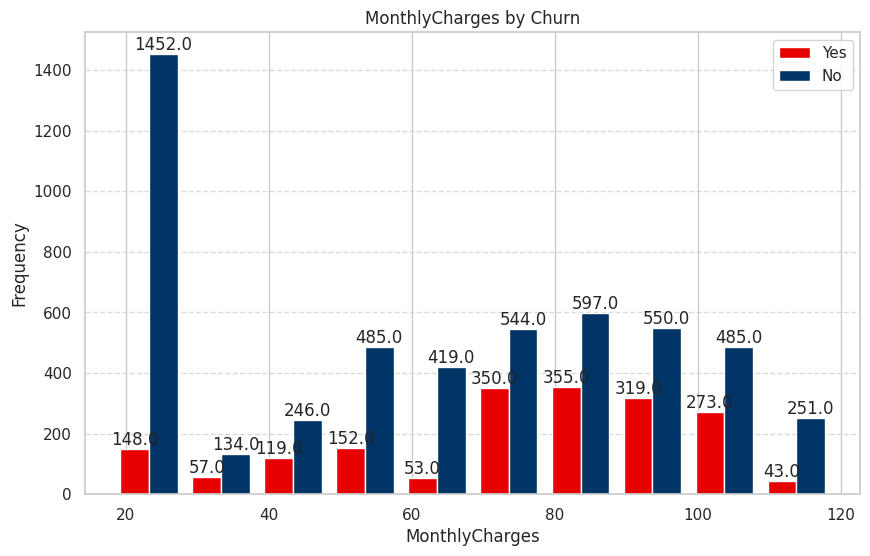

In [ ]:
# make plot for MonthlyCharges
churned = proj[proj['Churn'] == 'Yes']
not_churned = proj[proj['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['#e60000', '#003366'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

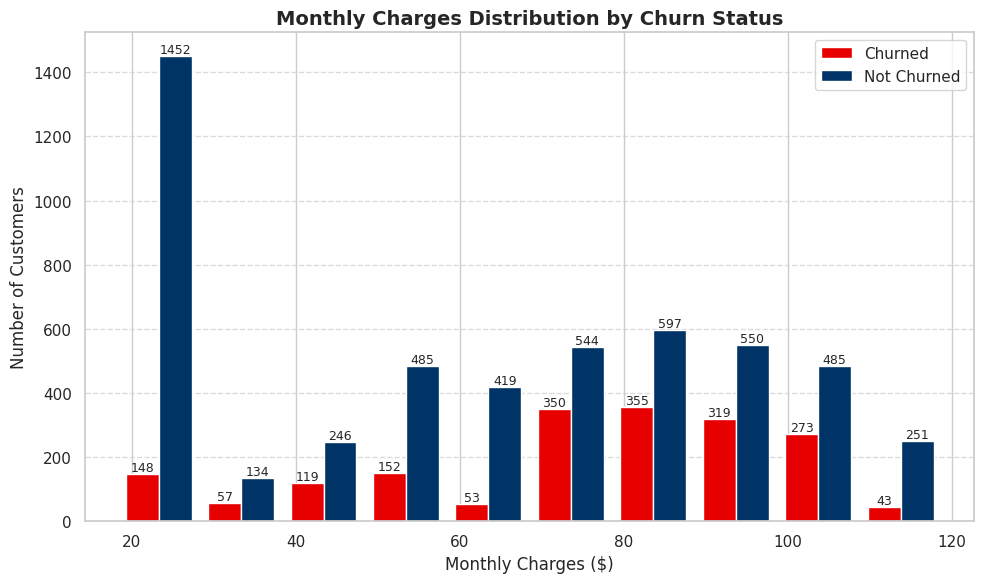

In [ ]:
# Split the dataset into churned and non-churned customers
churned = proj[proj['Churn'] == 'Yes']
not_churned = proj[proj['Churn'] == 'No']

# Creating a histogram to visualize the distribution of Monthly Charges by churn status
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10,
         color=['#e60000', '#003366'], label=['Churned', 'Not Churned'])

# Plot title and axis labels
plt.title('Monthly Charges Distribution by Churn Status', fontsize=14, weight='bold')
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add legend and gridlines for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with frequency values
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height, int(height),
                       ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


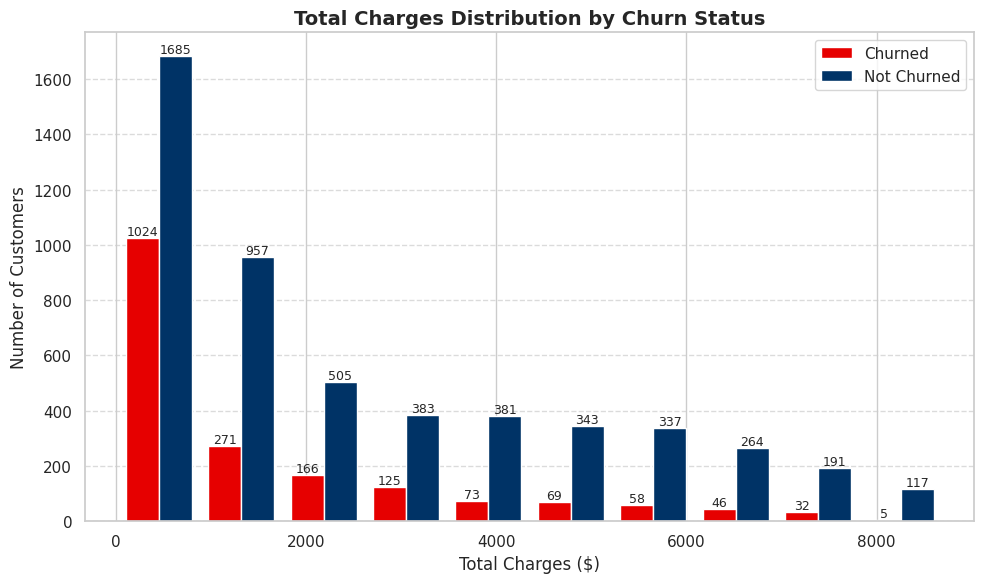

In [ ]:
# Filter the dataset into two groups based on churn status
churned = proj[proj['Churn'] == 'Yes']
not_churned = proj[proj['Churn'] == 'No']

# Plotting the distribution of Total Charges for churned vs. non-churned customers
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10,
         color=['#e60000', '#003366'], label=['Churned', 'Not Churned'])

# Adding title and axis labels to the plot
plt.title('Total Charges Distribution by Churn Status', fontsize=14, weight='bold')
plt.xlabel('Total Charges ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Adding legend and a light grid for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its height value (i.e., frequency count)
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height, int(height),
                       ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


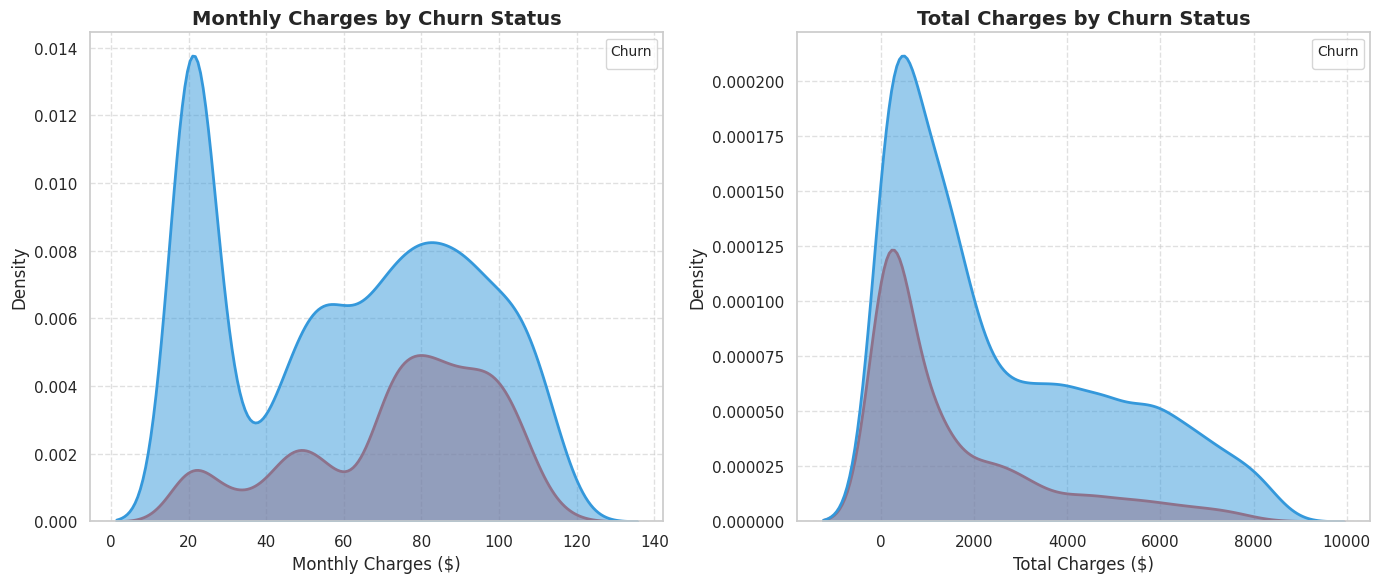

In [ ]:
# Creating side-by-side density plots for MonthlyCharges and TotalCharges, segmented by Churn status
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Color palette for Churn status
palette = {'Yes': '#e74c3c', 'No': '#3498db'}  # Red for Churned, Blue for Not Churned

# Plotting density of Monthly Charges
sns.kdeplot(
    data=proj, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0], palette=palette, linewidth=2
)
axes[0].set_title('Monthly Charges by Churn Status', fontsize=14, weight='bold')
axes[0].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Churn', title_fontsize='10', fontsize='9')

# Plotting density of Total Charges
sns.kdeplot(
    data=proj, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1], palette=palette, linewidth=2
)
axes[1].set_title('Total Charges by Churn Status', fontsize=14, weight='bold')
axes[1].set_xlabel('Total Charges ($)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title='Churn', title_fontsize='10', fontsize='9')

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


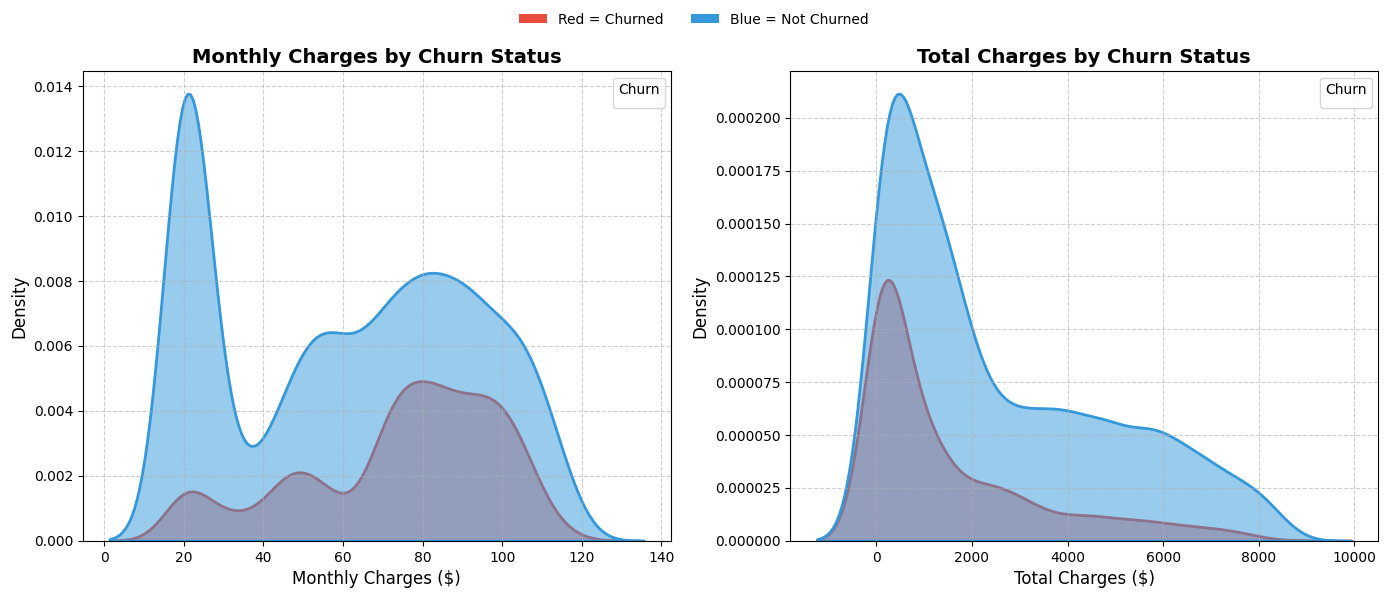

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Creating side-by-side density plots for MonthlyCharges and TotalCharges, segmented by Churn status
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Color palette for Churn status
palette = {'Yes': '#e74c3c', 'No': '#3498db'}  # Red for Churned, Blue for Not Churned

# Plotting density of Monthly Charges
sns.kdeplot(
    data=proj, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0], palette=palette, linewidth=2
)
axes[0].set_title('Monthly Charges by Churn Status', fontsize=14, weight='bold')
axes[0].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Churn', title_fontsize='10', fontsize='9')

# Plotting density of Total Charges
sns.kdeplot(
    data=proj, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1], palette=palette, linewidth=2
)
axes[1].set_title('Total Charges by Churn Status', fontsize=14, weight='bold')
axes[1].set_xlabel('Total Charges ($)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title='Churn', title_fontsize='10', fontsize='9')

# Adding custom legend label for color meaning
custom_labels = [
    Patch(facecolor='#e74c3c', label='Red = Churned'),
    Patch(facecolor='#3498db', label='Blue = Not Churned')
]
fig.legend(handles=custom_labels, loc='upper center', fontsize='10', ncol=2, frameon=False)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space at top for legend
plt.show()


<Axes: title={'center': 'Customer Survival Function over Tenure'}, xlabel='timeline'>

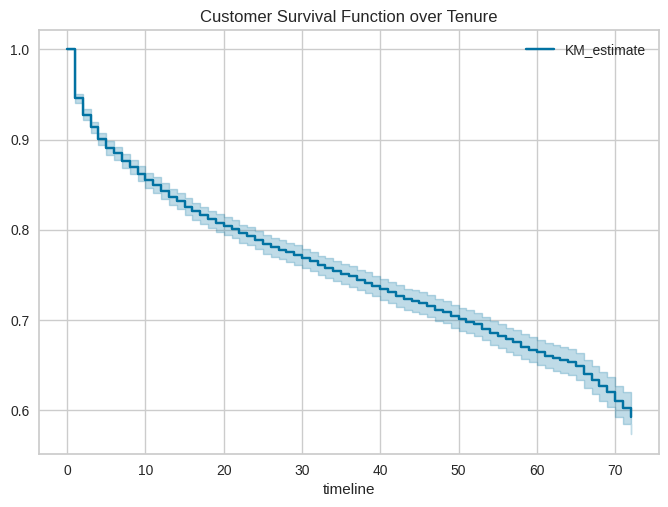

In [ ]:
from lifelines import KaplanMeierFitter

# Identify how likely customer stay over time (Months)
kmf = KaplanMeierFitter()
kmf.fit(durations=proj['tenure'], event_observed=(proj['Churn'] == 1.0))

kmf.plot_survival_function(title='Customer Survival Function over Tenure')

In [ ]:
#Encode the Data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Categorical columns
categorical_cols = proj.select_dtypes(include=['object', 'category']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(proj[categorical_cols])

# Create a DataFrame with encoded column names
encoded_proj = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Align indices to avoid concat issues
encoded_proj.index = proj.index

# Drop original categorical columns
proj.drop(columns=categorical_cols, inplace=True)

# Concatenate original df with encoded data
proj = pd.concat([proj, encoded_proj], axis=1)


In [ ]:
# rename churn_yes to churn
proj.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [ ]:
# split data into X and y
X = proj.drop('Churn', axis=1)
y = proj['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Define models and their parameter grids for tuning
models_to_tune = [
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [0.01, 0.05, 0.1, 0.2],
         'max_depth': [3, 4, 5]}),
    ('XG Boost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        {'max_depth': randint(3, 8),
         'learning_rate': uniform(0.01, 0.3),
         'n_estimators': randint(100, 500),
         'subsample': uniform(0.7, 0.3),
         'colsample_bytree': uniform(0.7, 0.3)})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and perform hyperparameter tuning
for name, model, param_grid in models_to_tune:
    print(f"--- Tuning {name} ---")

    if name == 'XG Boost':
        # Use RandomizedSearchCV for XGBoost due to larger parameter space
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='accuracy')
        random_search.fit(Xr_train, yr_train)
        best_estimator = random_search.best_estimator_
        print(f"Best parameters for {name}: {random_search.best_params_}")
    else:
        # Use GridSearchCV for other models
        grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
        grid_search.fit(Xr_train, yr_train)
        best_estimator = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Fit the best estimator on the training data
    best_estimator.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = best_estimator.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Print the performance metrics
    print(f"Test Accuracy for {name}: {accuracy * 100:.2f}%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator

# Convert the list to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Retrieve the overall best model
print("--- Overall Best Model ---")
print("Model:", best_model.__class__.__name__)
print("Test Accuracy:", f"{best_accuracy * 100:.2f}%")

--- Tuning Gradient Boosting ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy for Gradient Boosting: 96.11%

--- Tuning XG Boost ---
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for XG Boost: {'colsample_bytree': np.float64(0.7523099287014974), 'learning_rate': np.float64(0.21728132143073978), 'max_depth': 4, 'n_estimators': 459, 'subsample': np.float64(0.7412562832437979)}
Test Accuracy for XG Boost: 95.94%

--- Overall Best Model ---
Model: GradientBoostingClassifier
Test Accuracy: 96.11%


In [ ]:
%pip install shap

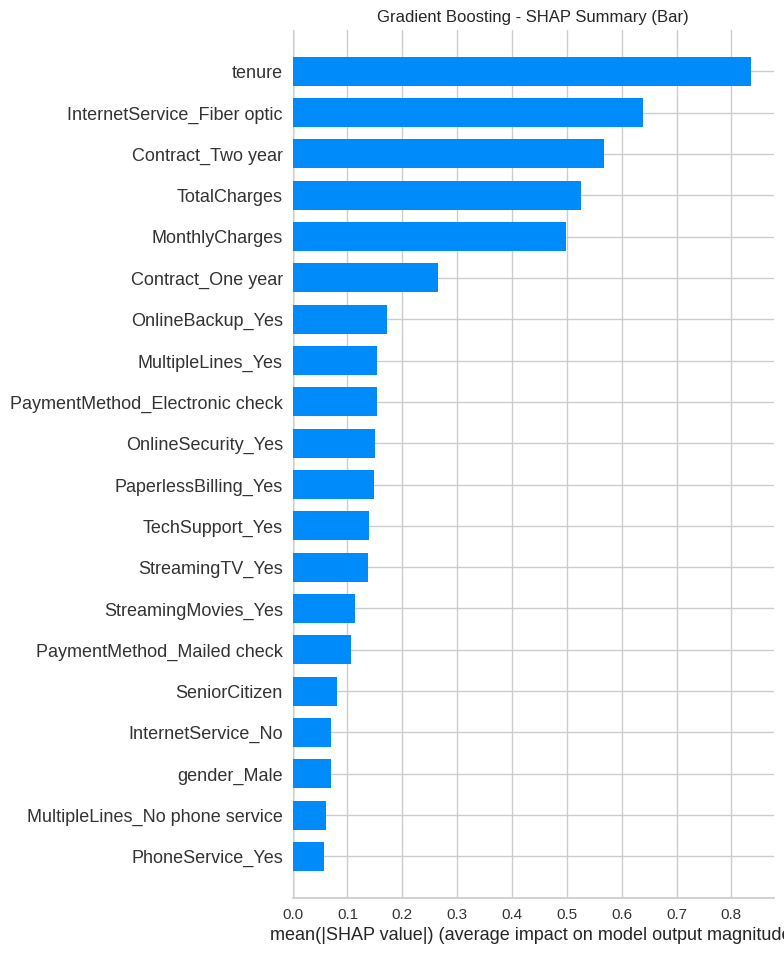

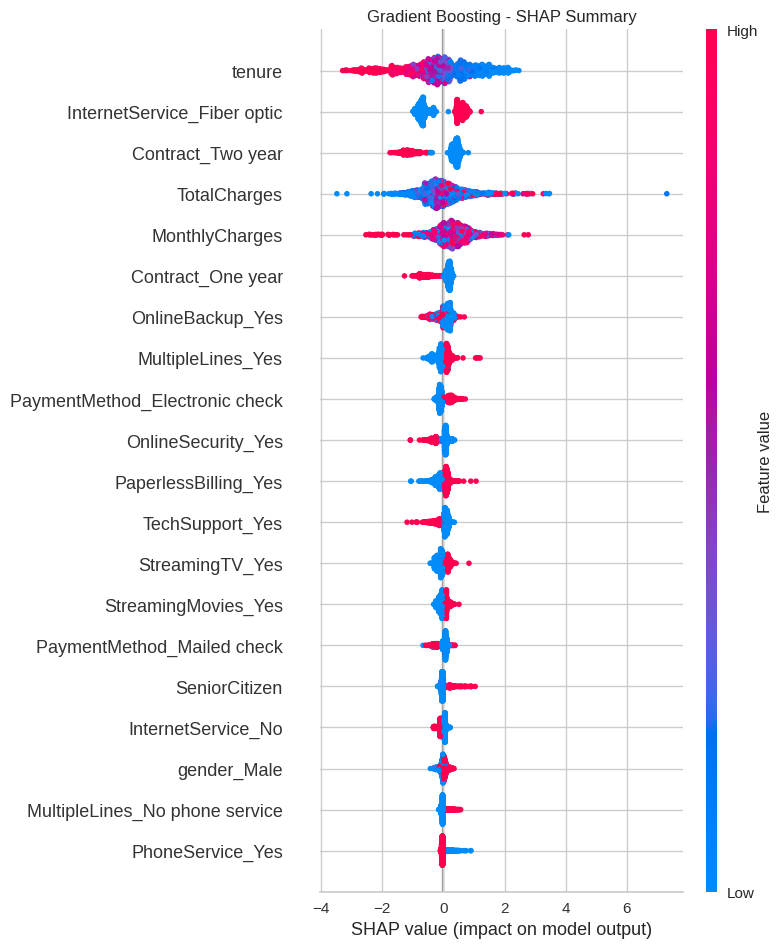

Gradient Boosting SHAP plots exported as JPEG files.


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_test and X_train, y_train are already defined

# Train the Gradient Boosting model with the best parameters
gb_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)

# Explain the model with SHAP
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('Gradient Boosting - SHAP Summary (Bar)')
plt.show()

# SHAP summary plot (dot)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('Gradient Boosting - SHAP Summary')
plt.show()

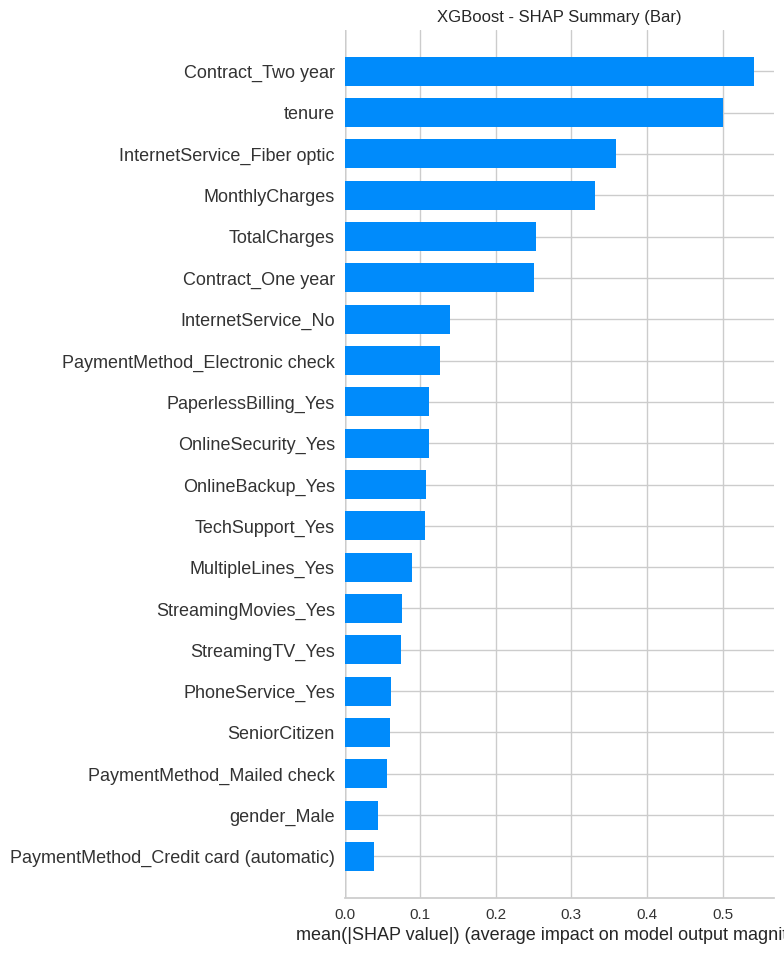

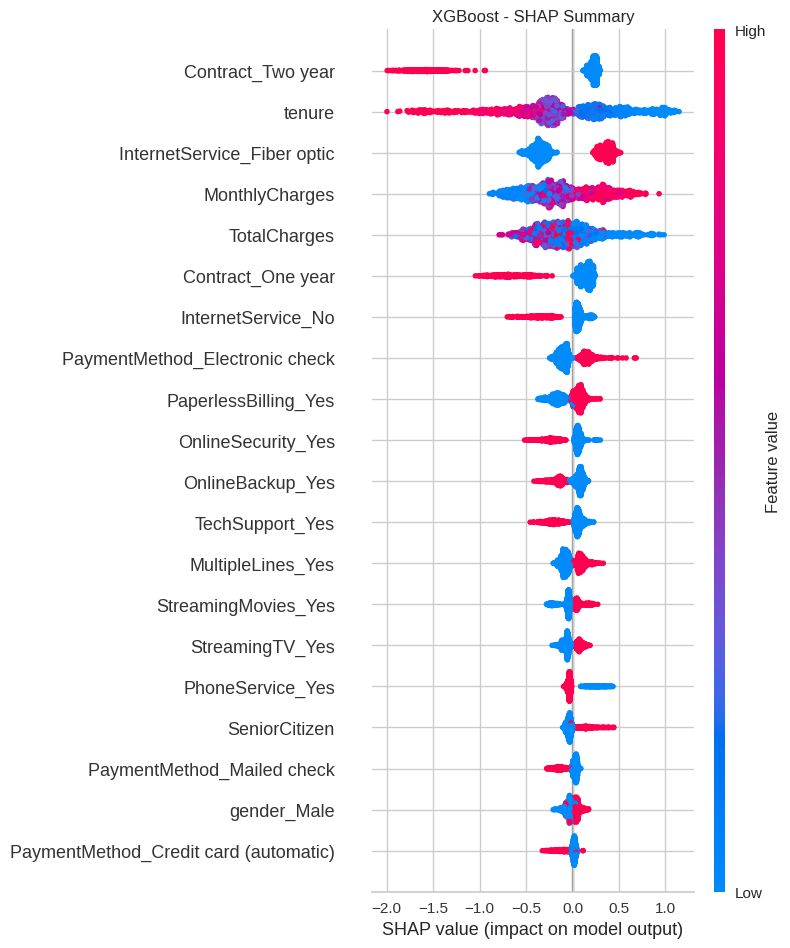

XGBoost SHAP plots generated.


In [ ]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming X_test and X_train, y_train are already defined

# Train the XGBoost model with the best parameters
xgb_model = xgb.XGBClassifier(colsample_bytree=0.7468055921327309,
                              learning_rate=0.05679835610086079,
                              max_depth=5,
                              n_estimators=187,
                              subsample=0.8001125833417065,
                              random_state=42,
                              use_label_encoder=False, # Add this if you see a warning
                              eval_metric='logloss') # Add this if you see a warning

xgb_model.fit(X_train, y_train)

# Explain the model with SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('XGBoost - SHAP Summary (Bar)')
plt.show()

# SHAP summary plot (dot)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('XGBoost - SHAP Summary')
plt.show()

print("XGBoost SHAP plots generated.")